# Simulating MIMIC Patient
We used Biogears engine to simulate patients in MIMIC, initializing them using their readings in MIMIC, and administering IV fluids and vasopressors at each time step as done in MIMIC. (See [SepsisSimulation_main.cpp](https://github.com/faaizT/core/blob/mimic-simulator/projects/howto/SimulationScripts/src/SepsisSimulation_main.cpp) for more details.)  

In [1]:
import pandas as pd
icustayid = 34541.0
biogears_output = '/Users/faaiz/exportdir-biogears/SimulateMIMIC_34541.000000_2021-02-22.00-54-20.csv'
mimic_csv = "/USers/faaiz/exportdir/MIMICtable-1hourly_entire-stay.csv"

In [2]:
simulation = pd.read_csv(biogears_output, dtype={"Piperacillin-BloodConcentration": str, "Tazobactam-BloodConcentration": str})
simulation.head()

,Time(s),HeartRate(1/min),MeanArterialPressure(mmHg),SystolicArterialPressure(mmHg),DiastolicArterialPressure(mmHg),CardiacOutput(mL/min),HemoglobinContent(g),CentralVenousPressure(mmHg),Hematocrit,ArterialBloodPH,...,RespirationRate(1/min),OxygenSaturation,CarbonDioxideSaturation,CoreTemperature(degC),SkinTemperature(degC),Bicarbonate-BloodConcentration(ug/mL),Creatinine-BloodConcentration(ug/mL),Lactate-BloodConcentration(ug/mL),Piperacillin-BloodConcentration,Tazobactam-BloodConcentration
0,1.0,100.500,78.7933,95.9519,60.3507,7995.43,2603.98,3.48651,0.459445,7.39483,...,20.5479,0.976363,0.027991,37.1089,33.3469,1599.12,11.4496,77.4277,-1.$,-1.$
1,2.0,101.774,78.8435,96.0914,60.4330,8102.83,2603.98,3.49484,0.459444,7.39474,...,20.5479,0.976350,0.027988,37.1092,33.3477,1599.12,11.4493,77.4289,0,0
2,3.0,101.659,78.8240,96.0651,60.4196,8094.79,2603.98,3.47730,0.459443,7.39469,...,20.5479,0.976344,0.027987,37.1095,33.3485,1599.13,11.4491,77.4302,0,0
3,4.0,101.637,78.8207,96.0611,60.4172,8093.97,2603.98,3.48528,0.459442,7.39463,...,20.5479,0.976335,0.027985,37.1099,33.3493,1599.14,11.4485,77.4312,0,0
4,5.0,101.660,78.8275,96.0731,60.4188,8097.95,2603.98,3.49371,0.459441,7.39453,...,20.5479,0.976322,0.027981,37.1102,33.3501,1599.14,11.4482,77.4325,0,0


In [3]:
first_row = simulation.iloc[0].to_dict()
first_row['Time(s)'] = 0
simulation = pd.concat([pd.DataFrame([first_row]), simulation], ignore_index=True)
simulation.head()

,Time(s),HeartRate(1/min),MeanArterialPressure(mmHg),SystolicArterialPressure(mmHg),DiastolicArterialPressure(mmHg),CardiacOutput(mL/min),HemoglobinContent(g),CentralVenousPressure(mmHg),Hematocrit,ArterialBloodPH,...,RespirationRate(1/min),OxygenSaturation,CarbonDioxideSaturation,CoreTemperature(degC),SkinTemperature(degC),Bicarbonate-BloodConcentration(ug/mL),Creatinine-BloodConcentration(ug/mL),Lactate-BloodConcentration(ug/mL),Piperacillin-BloodConcentration,Tazobactam-BloodConcentration
0,0.0,100.500,78.7933,95.9519,60.3507,7995.43,2603.98,3.48651,0.459445,7.39483,...,20.5479,0.976363,0.027991,37.1089,33.3469,1599.12,11.4496,77.4277,-1.$,-1.$
1,1.0,100.500,78.7933,95.9519,60.3507,7995.43,2603.98,3.48651,0.459445,7.39483,...,20.5479,0.976363,0.027991,37.1089,33.3469,1599.12,11.4496,77.4277,-1.$,-1.$
2,2.0,101.774,78.8435,96.0914,60.4330,8102.83,2603.98,3.49484,0.459444,7.39474,...,20.5479,0.976350,0.027988,37.1092,33.3477,1599.12,11.4493,77.4289,0,0
3,3.0,101.659,78.8240,96.0651,60.4196,8094.79,2603.98,3.47730,0.459443,7.39469,...,20.5479,0.976344,0.027987,37.1095,33.3485,1599.13,11.4491,77.4302,0,0
4,4.0,101.637,78.8207,96.0611,60.4172,8093.97,2603.98,3.48528,0.459442,7.39463,...,20.5479,0.976335,0.027985,37.1099,33.3493,1599.14,11.4485,77.4312,0,0


In [4]:
MIMICtable = pd.read_csv(mimic_csv)
MIMICtable.head()

,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
0,1.0,1006.0,4.330306e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,8166.0,4083.0,-8166.0,1.0
1,11.0,1006.0,4.330342e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,12249.0,4083.0,-12249.0,1.0
2,21.0,1006.0,4.330378e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.831461,240.000000,0.0,0.0,0.0,0.0,16332.0,4083.0,-16332.0,1.0
3,22.0,1006.0,4.330382e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.955357,96.000000,0.0,0.0,0.0,0.0,20415.0,4083.0,-20415.0,1.0
4,23.0,1006.0,4.330385e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.812749,109.714286,0.0,0.0,175.0,175.0,24298.0,3883.0,-24123.0,1.0


In [5]:
MIMICtable_filtered = MIMICtable[MIMICtable['icustay_id']==icustayid]
len(MIMICtable_filtered)

51

In [6]:
MIMICtable_filtered.insert(0,'Time(s)',MIMICtable_filtered['charttime']-MIMICtable_filtered['charttime'].values[0])

In [7]:
MIMICtable_filtered.head()

,Time(s),bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
972,0.0,1.0,34541.0,7.271906e+09,0.0,23326.676875,3.0,1.0,0.0,0.0,...,1.046875,96.000000,0.0,0.0,0.0,0.0,9300.0,4650.0,-9300.0,1.0
973,10800.0,4.0,34541.0,7.271916e+09,0.0,23326.676875,3.0,1.0,0.0,0.0,...,0.920139,154.166667,0.0,0.0,0.0,0.0,13950.0,4650.0,-13950.0,1.0
974,14400.0,5.0,34541.0,7.271920e+09,0.0,23326.676875,3.0,1.0,0.0,0.0,...,0.900049,200.000000,0.0,0.0,0.0,0.0,18600.0,4650.0,-18600.0,1.0
975,18000.0,6.0,34541.0,7.271924e+09,0.0,23326.676875,3.0,1.0,0.0,0.0,...,0.831461,240.000000,0.0,0.0,2500.0,2500.0,23250.0,4650.0,-20750.0,1.0
976,21600.0,7.0,34541.0,7.271927e+09,0.0,23326.676875,3.0,1.0,0.0,0.0,...,0.772277,192.000000,0.0,0.0,2500.0,0.0,27900.0,4650.0,-25400.0,1.0


In [8]:
simulation = simulation[simulation['Time(s)'].isin(MIMICtable_filtered['Time(s)'])]

In [9]:
time = simulation['Time(s)']
diaBP_biogears = simulation['DiastolicArterialPressure(mmHg)']
diaBP_mimic = MIMICtable_filtered['DiaBP']

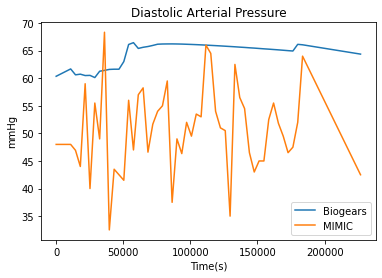

In [11]:
import matplotlib.pyplot as plt
plt.plot(time, diaBP_biogears)
plt.plot(time, diaBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Diastolic Arterial Pressure')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

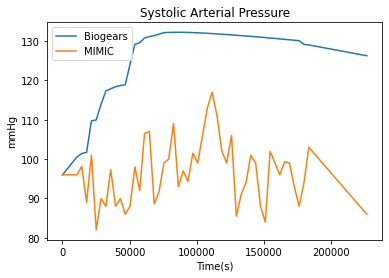

In [12]:
sysBP_biogears = simulation['SystolicArterialPressure(mmHg)']
sysBP_mimic = MIMICtable_filtered['SysBP']
plt.plot(time, pd.to_numeric(sysBP_biogears))
plt.plot(time, sysBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Systolic Arterial Pressure')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

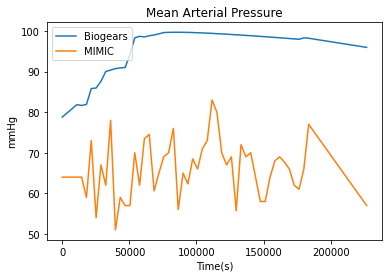

In [13]:
meanBP_biogears = simulation['MeanArterialPressure(mmHg)']
meanBP_mimic = MIMICtable_filtered['MeanBP']
plt.plot(time, pd.to_numeric(meanBP_biogears))
plt.plot(time, meanBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Mean Arterial Pressure')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

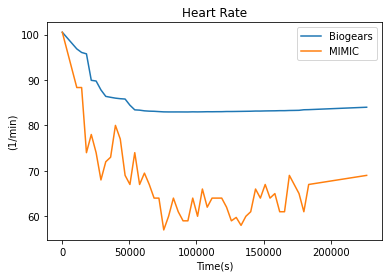

In [14]:
HR_biogears = simulation['HeartRate(1/min)']
HR_mimic = MIMICtable_filtered['HR']
plt.plot(time, pd.to_numeric(HR_biogears))
plt.plot(time, HR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('(1/min)')
plt.title('Heart Rate')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

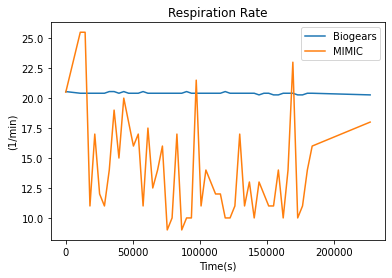

In [15]:
RR_biogears = simulation['RespirationRate(1/min)']
RR_mimic = MIMICtable_filtered['RR']
plt.plot(time, pd.to_numeric(RR_biogears))
plt.plot(time, RR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('(1/min)')
plt.title('Respiration Rate')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

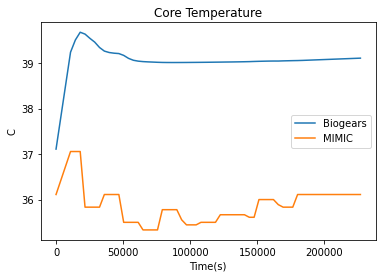

In [16]:
temp_biogears = simulation['CoreTemperature(degC)']
temp_mimic = MIMICtable_filtered['Temp_C']
plt.plot(time, pd.to_numeric(temp_biogears))
plt.plot(time, temp_mimic)
plt.xlabel('Time(s)')
plt.ylabel('C')
plt.title('Core Temperature')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

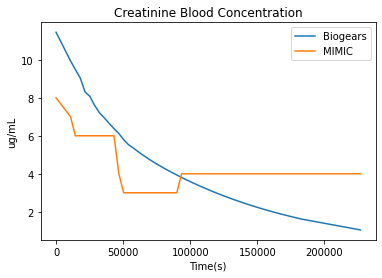

In [17]:
creatinine_biogears = simulation['Creatinine-BloodConcentration(ug/mL)']
creatinine_mimic = MIMICtable_filtered['Creatinine']*10
plt.plot(time, pd.to_numeric(creatinine_biogears))
plt.plot(time, creatinine_mimic)
plt.xlabel('Time(s)')
plt.ylabel('ug/mL')
plt.title('Creatinine Blood Concentration')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

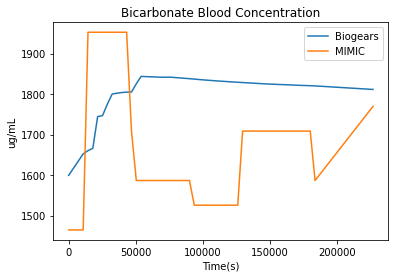

In [18]:
bicarbonate_biogears = simulation['Bicarbonate-BloodConcentration(ug/mL)']
bicarbonate_mimic = MIMICtable_filtered['HCO3']*61.0168
plt.plot(time, pd.to_numeric(bicarbonate_biogears))
plt.plot(time, bicarbonate_mimic)
plt.xlabel('Time(s)')
plt.ylabel('ug/mL')
plt.title('Bicarbonate Blood Concentration')
plt.legend(['Biogears', 'MIMIC'])
plt.show()